# **Projeto Final: EDIT-DSBA** 
## **Modelo de Previsão de Vendas (Machine Learning)**
### **Grupo 3: Francisco Ramalhosa, Henrique Zauli, Hernani Luz, Matheus Nascimento**
##### **ramalhosafrancisco@gmail.com; henrique.zauli@gmail.com; hluz00@gmail.com; matheus.lpd.nascimento@gmail.com.**
##### **Módulo 10: Applied Practice** 
##### **Fevereiro 2024, Lisboa**

## **Contexto:**

Neste projeto, desenvolvemos e testamos dois modelos preditivos para prever com maior precisão possível o 'valor' de vendas por loja e para um número específicado de dias.  
Os modelos utilizados foram o 'XGBoostRegressor' e o 'RandomForestRegressor'.  
O principal objetivo é fornecer previsões do valor de vendas por loja que ajudem na tomada de decisões e que possam ser relacionadas ao planeamento de 'stock', gestão de recursos e estratégias de marketing.  
Durante o pré-processamento dos dados, foram consideradas diversas técnicas para garantir a qualidade e eficácia dos modelos. Isso incluiu: normalização dos dados para garantir que todas as características tivessem a mesma escala; 'one-hot-encoding' para lidar com variáveis categóricas; e o método 'shift()' para introduzir informações temporais históricas nos dados (por deslocação dos dados do DataFrame nas colunas específicadas). Além disso, foram adotadas técnicas de 'hypertuning parameter' com o 'RandomizedSearchCV' para encontrar os melhores parâmetros que se ajustam aos modelos referidos.  
A cada iteração dos modelos, os dados de teste foram sendo sequencialmente substituidos pelos dados previstos anteriores; as oscilações dos erros absolutos obtidos a cada previsão foram visualizados gráficamente para ententer a partir de que momento o modelo começa a perder confiabilidade e precisão. Foi também testado um eventual cenário mais realista sem a coluna de 'itens' no conjunto de dados (X e y).

## **ÍNDICE**

## **1. Importação de Bibliotecas**
## **2. Importação do 'DataSet'**
## **3. União do DataFrame 'Clusters' ('df_cluster') à Base de Dados ('df')**
## **4. Agrupamento por 'Loja' e ordenação cronológica por 'data'**
## **5. Séries Temporais- Método Shift (com deslocamento positivo)**
## **6. Pré-processamento**
### **6.1. Definir variáveis**
### **6.2. Definir 'data' como index**
### **6.3. Divisão do Conjunto de Dados ('split')**
### **6.4. Normalização Min-Max (Variáveis Númericas)**
### **6.5. One-Hot Encoding (Variáveis Categóricas)**
### **6.6. Concatenação das Variáveis Numéricas e Categóricas Independentes**
### **6.7. Verificação de Valores Nulos**
## **7. Modelos Preditivos de Regressão**
### **7.1 Extreme Gradient Boosting (XGBoost) Regressor**
#### **7.1.1. Randomized SearchCV (RSCV) - XGB Hypertuning Parameter**
#### **7.1.2. Melhores Parâmetros XGB (Best Params)**
#### **7.1.3. Execução de XGBoost Regressor com os 'Melhores Parametros' Guardados Previamente**
##### **7.1.3.1. Previsões com os Melhores Parâmetros XGB**
##### **7.1.3.2. Melhor Resultado XGB (Best Score)**
##### **7.1.3.3. Erro Quadrático Médio XGB - Mean Squared Error (MSE)**
##### **7.1.3.4. Erro Médio Absoluto XGB - Mean Absolute Error (MAE)**
##### **7.1.3.5. Coeficiente de Determinação XGB (R^2)**
##### **7.1.3.6. Top 10 Feature Importance XGB**
#### **7.1.4. Previsões XGBOOST do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
##### **7.1.4.1. Erro Quadrático Médio XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
##### **7.1.4.2. Erro Médio Absoluto XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
##### **7.1.4.3. Coeficiente de Determinação (R^2) XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
#### **7.1.5. Confiabilidade do Modelo XGB (visualização da acumulação dos erros) - Representação Gráfica e RSD (exemplo: Setúbal)**
#### **7.1.6. Execução de XGBRegressor - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.1. Randomized SearchCV (RSCV) - XGB Hypertuning Parameter  - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.2. Melhores Parâmetros XGB (Best Params) - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.3. Execução de XGBoost Regressor com os 'Melhores Parametros' Guardados Previamente - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.4. Previsões com os Melhores Parâmetros XGB - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.5. Erro Quadrático Médio XGB - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.6. Erro Médio Absoluto XGB - SEM VARIÁVEL 'ITENS'**
##### **7.1.6.7. Coeficiente de Determinação XGB (R^2) - SEM VARIÁVEL 'ITENS'**
#### **7.1.7. Previsões XGB do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**
##### **7.1.7.1. Erro Quadrático Médio XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
##### **7.1.7.2. Erro Médio Absoluto XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
##### **7.1.7.3. Coeficiente de Determinação XGB (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
#### **7.1.8. Confiabilidade do Modelo XGB (visualização da acumulação dos erros)- Representação Gráfica e RSD (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**
### **7.2. Random Forest Regressor (RFR)**
#### **7.2.1. Randomized SearchCV (RSCV) - RFR Hypertuning Parameter**
##### **7.2.1.1. Melhores Parâmetros RFR (Best Params)**
#### **7.2.2. Execução de Random Forest Regressor com os Melhores Parametros Guardados Previamente**
##### **7.2.2.1. Best Score RFR**
##### **7.2.2.2. Predições com os Melhores Parâmetros RFR** 
##### **7.2.2.3. Erro Quadrático Médio RFR**
##### **7.2.2.4. Erro Médio Absoluto RFR**
##### **7.2.2.5. Coeficiente de Determinação RFR (R^2)**
##### **7.2.2.6. Feature Importance RFR (sem incluir 'itens')**
#### **7.2.3. Previsões com os Melhores Parâmetros RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)** 
##### **7.2.3.1. Erro Quadrático Médio RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
##### **7.2.3.2. Erro Médio Absoluto RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
##### **7.2.3.3. Coeficiente de Determinação (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**
#### **7.2.4. Confiabilidade do Modelo RFR (visualização da acumulação dos erros) - Representação Gráfica e RSD (exemplo: Setúbal)**
#### **7.2.5. Execução de Random Forest Regressor - SEM VARIÁVEL 'ITENS'**
##### **7.1.5.1. Randomized SearchCV (RSCV) - RFR Hypertuning Parameter  - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.2. Melhores Parâmetros RFR (Best Params) - SEM VARIÁVEL 'ITENS'**
##### **Melhores Parâmetros RFR - Guardados - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.3. Execução de RFR com os 'Melhores Parametros' Guardados Previamente - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.4. Previsões com os Melhores Parâmetros RFR - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.5. Erro Médio Quadrático RFR - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.6. Erro Médio Absoluto RFR - SEM VARIÁVEL 'ITENS'**
##### **7.2.5.7. Coeficiente de Determinação RFR (R^2) - SEM VARIÁVEL 'ITENS'**
#### **7.2.6. Previsões RFR do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**
##### **7.2.6.1. Erro Quadrático Médio RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
##### **7.2.6.2. Erro Médio Absoluto RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
##### **7.2.6.3. Coeficiente de Determinação RFR (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**
#### **7.2.7. Confiabilidade do Modelo RFR (visualização da acumulação dos erros)- Representação Gráfica e RSD (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**
## **8. Conclusão**

## **1. Importação de Bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector
from scipy.stats import zscore, mstats, chi2_contingency, f_oneway
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from xgboost import XGBClassifier
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import randint, shapiro, ttest_ind
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## **2. Importação do 'DataSet'**

In [2]:
df_cluster = pd.read_csv('df_cluster')

In [3]:
df = pd.read_excel('df.xlsx')

In [4]:
df_cluster.head(5)

,loja,cluster
0,Alfragide,2
1,Almada Fórum,5
2,Alverca,5
3,Aveiro,1
4,Caldas da Rainha,5


In [5]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   loja     70 non-null     object
 1   cluster  70 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [6]:
df.head()

,fk_secao,loja,data,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,fk_loja,...,contagem_eventos,descricao_feriado,feriado_fixo,tipo,ano,mês,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais
0,522,Viseu,2020-01-05,33814,109862.214392,891,1581,0.138385,0.127587,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
1,522,Viseu,2020-01-09,22926,63819.583059,1655,1200,0.106688,0.149941,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
2,522,Viseu,2020-01-24,26055,72578.031031,894,1000,0.129946,0.123635,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
3,522,Viseu,2020-01-27,23556,60853.098660,1066,1121,0.180477,0.198495,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
4,522,Viseu,2020-01-30,21653,61461.643038,1296,1139,0.162686,0.181002,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98628 entries, 0 to 98627
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fk_secao                         98628 non-null  int64         
 1   loja                             98628 non-null  object        
 2   data                             98628 non-null  datetime64[ns]
 3   itens                            98628 non-null  int64         
 4   valor                            98628 non-null  float64       
 5   skus_+                           98628 non-null  int64         
 6   skus_-                           98628 non-null  int64         
 7   var_preço_+                      98628 non-null  float64       
 8   var_preço_-                      98628 non-null  float64       
 9   fk_loja                          98628 non-null  object        
 10  fk_cidade                        98628 non-null  int64    

## **3. União do DataFrame 'Clusters' ('df_cluster') à Base de Dados ('df')**

In [8]:
df = pd.merge(df_cluster, df, on='loja')

In [9]:
df.head()

,loja,cluster,fk_secao,data,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,...,contagem_eventos,descricao_feriado,feriado_fixo,tipo,ano,mês,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais
0,Alfragide,2,976,2020-01-12,91677,232281.985291,3849,4094,0.152379,0.163360,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
1,Alfragide,2,976,2020-01-16,53256,137511.968904,4486,4764,0.198948,0.195127,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
2,Alfragide,2,976,2020-01-20,56032,133404.433450,6025,3962,0.182473,0.188015,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
3,Alfragide,2,976,2020-01-28,48285,136756.731686,3121,11524,0.054962,0.360190,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
4,Alfragide,2,976,2020-02-04,47922,139091.023581,2833,13137,0.032507,0.449475,...,0,não houve feriado,não houve feriado,não houve feriado,2020,2,08:00:00 - 21:00:00,13.0,23.529412,76.470588


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98628 entries, 0 to 98627
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   loja                             98628 non-null  object        
 1   cluster                          98628 non-null  int64         
 2   fk_secao                         98628 non-null  int64         
 3   data                             98628 non-null  datetime64[ns]
 4   itens                            98628 non-null  int64         
 5   valor                            98628 non-null  float64       
 6   skus_+                           98628 non-null  int64         
 7   skus_-                           98628 non-null  int64         
 8   var_preço_+                      98628 non-null  float64       
 9   var_preço_-                      98628 non-null  float64       
 10  fk_loja                          98628 non-null  object   

## **4. Agrupamento por 'Loja' e ordenação cronológica por 'data'**

Para modelar esta série temporal de faturação por loja, é fundamental que os dados estejam organizados em ordem cronológica e simultaneamente agrupados por loja.

In [11]:
df = df.groupby('loja').apply(lambda x: x.sort_values('data')).reset_index(drop=True)

In [12]:
df.head(5)

,loja,cluster,fk_secao,data,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,...,contagem_eventos,descricao_feriado,feriado_fixo,tipo,ano,mês,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais
0,Alfragide,2,976,2020-01-02,62745,184916.557364,6059,4461,0.141088,0.112762,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
1,Alfragide,2,976,2020-01-03,62196,186198.876237,4799,4111,0.163005,0.184553,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
2,Alfragide,2,976,2020-01-04,91874,273227.605267,6729,4749,0.127493,0.172075,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
3,Alfragide,2,976,2020-01-05,77923,223363.176849,5378,6301,0.130189,0.199583,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588
4,Alfragide,2,976,2020-01-06,55440,151308.764944,5523,5018,0.103168,0.160101,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588


## **5. Séries Temporais- Método Shift (com deslocamento positivo)**

**Séries Temporais:** Uma série temporal é uma sequência de dados coletados ao longo do tempo, geralmente em intervalos regulares.  
O principal objetivo da análise de séries temporais no contexto de 'Machine Learning', é prever o futuro com base em dados históricos. Ao usar dados do dia anterior como entrada (por exemplo), estamos a simular uma situação realista onde o modelo utiliza informações do passado para fazer previsões sobre o futuro.

**Problema a ser evitado:** Se utilizarmos os próprios valores do dia como entrada para prever o mesmo dia, estamos essencialmente a dar ao modelo a resposta que ele está a tentar prever. Isto pode levar a resultados muito otimistas e irreais durante o treino e não irá fornecer informações úteis para o modelo fazer previsões sobre dados futuros. É então importante aplicar o método 'shift()' para evitar estes cenários.

**Método Shift:** O método 'shift()' é usado para deslocar os dados de um DataFrame numa coluna específica. Por exemplo, quando se aplica shift(+1), estamos a mover os dados uma unidade para baixo (ou seja, **deslocamento positivo**), o que pode ser útil em análises de séries temporais para comparar um ponto no tempo com o ponto anterior.

**Shift(+1) e Shift(+7):** Aplicamos dois tipos de deslocamento. O shift(+1) desloca os valores para baixo uma unidade, o que significa que cada valor é substituído pelo valor que estava uma unidade acima na coluna. Isto pode ser usado para comparar os valores de um dia com o dia anterior. O shift(+7) desloca os valores para baixo em sete unidades, o que pode ser útil para comparar valores com o mesmo dia da semana na semana anterior.
Ao aplicar o método 'shift()' com deslocamento positivo na variável 'valor', estamos a criar novas colunas que representam os valores deslocados no tempo, permitindo análises comparativas de padrões temporais nos dados de faturação de cada loja.

In [13]:
df['lag_1_dia'] = df.groupby('loja')['valor'].shift(1)
df['lag_1_semana'] = df.groupby('loja')['valor'].shift(7)

In [14]:
df.head(5)

,loja,cluster,fk_secao,data,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,...,feriado_fixo,tipo,ano,mês,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais,lag_1_dia,lag_1_semana
0,Alfragide,2,976,2020-01-02,62745,184916.557364,6059,4461,0.141088,0.112762,...,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588,NaN,NaN
1,Alfragide,2,976,2020-01-03,62196,186198.876237,4799,4111,0.163005,0.184553,...,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588,184916.557364,NaN
2,Alfragide,2,976,2020-01-04,91874,273227.605267,6729,4749,0.127493,0.172075,...,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588,186198.876237,NaN
3,Alfragide,2,976,2020-01-05,77923,223363.176849,5378,6301,0.130189,0.199583,...,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588,273227.605267,NaN
4,Alfragide,2,976,2020-01-06,55440,151308.764944,5523,5018,0.103168,0.160101,...,não houve feriado,não houve feriado,2020,1,08:00:00 - 21:00:00,13.0,23.529412,76.470588,223363.176849,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98628 entries, 0 to 98627
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   loja                             98628 non-null  object        
 1   cluster                          98628 non-null  int64         
 2   fk_secao                         98628 non-null  int64         
 3   data                             98628 non-null  datetime64[ns]
 4   itens                            98628 non-null  int64         
 5   valor                            98628 non-null  float64       
 6   skus_+                           98628 non-null  int64         
 7   skus_-                           98628 non-null  int64         
 8   var_preço_+                      98628 non-null  float64       
 9   var_preço_-                      98628 non-null  float64       
 10  fk_loja                          98628 non-null  object   

##### Exportação do df_ml

In [16]:
#df_ml.to_csv('df', index=False)

## **6. Pré-processamento**

### **6.1. Definir variáveis**

In [17]:
variaveis_numericas = df[['itens','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos', 'cluster','horas_laborais', 'mês', 'lag_1_dia', 'lag_1_semana']]
variaveis_categoricas = df[['loja', 'cidade','regiao','feriado_fixo']]
variaveis_excluidas = df[['fk_secao', 'fk_loja', 'fk_cidade', 'fk_regiao', 'secao', 'abertura', 'fecho', 'tipo', 'tipo_horario', 'descricao_feriado', 'percentagem_self_checkouts', 'percentagem_caixas_tradicionais']]

### **6.2. Definir 'data' como index**

In [18]:
df.set_index('data', inplace=True)

### **6.3. Divisão do Conjunto de Dados ('split')**

In [19]:
X = df.drop(['valor', 'fk_secao', 'fk_loja', 'fk_cidade', 'fk_regiao', 'secao', 'abertura', 'fecho', 'tipo'], axis=1) 
y = df['valor']

In [20]:
# Definir data de início e de fim.
data_inicio = pd.to_datetime('2019-01-01')
data_final = pd.to_datetime('2024-01-01')

# Calcular a diferença de tempo entre as duas datas.
diferenca_tempo = data_final - data_inicio

# Adicionar 70% da diferença de tempo à data inicial.
data_70_percent = data_inicio + 0.7 * diferenca_tempo

# Exibir a data correspondente a 70%.
print("Data correspondente a 70% do intervalo entre 2019 e 2024:", data_70_percent)

Data correspondente a 70% do intervalo entre 2019 e 2024: 2022-07-02 04:48:00


In [21]:
X_train = X[X.index <= "2022-07-02"]
X_test = X[X.index > "2022-07-02"]
y_train =  y[y.index <= "2022-07-02"]
y_test = y[y.index > "2022-07-02"]

In [22]:
X_train_num = X_train[['itens','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos', 'cluster','horas_laborais', 'mês', 'lag_1_dia', 'lag_1_semana']]

In [23]:
X_train_cat = X_train[['loja', 'cidade','regiao','feriado_fixo']]

In [24]:
X_test_num = X_test[['itens','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos', 'cluster','horas_laborais', 'mês', 'lag_1_dia', 'lag_1_semana']]

In [25]:
X_test_cat = X_test[['loja', 'cidade','regiao','feriado_fixo']]

### **6.4. Normalização Min-Max (Variáveis Númericas)**

In [26]:
scaler_minmax = MinMaxScaler()
X_train_num = scaler_minmax.fit_transform(X_train_num)
X_test_num = scaler_minmax.transform(X_test_num)

In [27]:
X_train_num_df = pd.DataFrame(X_train_num, columns=['itens','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos', 'cluster','horas_laborais', 'mês', 'lag_1_dia', 'lag_1_semana'])

In [28]:
X_test_num_df = pd.DataFrame(X_test_num, columns=['itens','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos', 'cluster','horas_laborais', 'mês', 'lag_1_dia', 'lag_1_semana'])

### **6.5. One-Hot Encoding (Variáveis Categóricas)**

In [29]:
#handle_unknown='ignore', ??

In [30]:
encoder = OneHotEncoder(drop='first') 
X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

In [31]:
X_train_cat_df = pd.DataFrame(
    X_train_cat.toarray(),
    columns=encoder.get_feature_names_out(['loja', 'cidade','regiao','feriado_fixo'])
)

In [32]:
X_test_cat_df = pd.DataFrame(
    X_test_cat.toarray(),
    columns=encoder.get_feature_names_out(['loja', 'cidade','regiao','feriado_fixo'])
)

### **6.6. Concatenação das Variáveis Numéricas e Categóricas Independentes**

In [33]:
X_train = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [34]:
print('Xtrain.shape',X_train.shape )

Xtrain.shape (65816, 134)


In [35]:
print('Xtrain.shape',X_test.shape )

Xtrain.shape (32812, 134)


### **6.7. Verificação de Valores Nulos**

In [36]:
def verifica_nulos(df):
    info_nulos = []
    for coluna in df.columns:
        nulos = df[coluna].isnull().sum()
        if nulos != 0:
            info_nulos.append({'Coluna': coluna, 'Nulos': nulos})
    return pd.DataFrame(info_nulos)
resultado = verifica_nulos(X_train)
# Exiba o resultado
print(resultado)

         Coluna  Nulos
0     lag_1_dia     70
1  lag_1_semana    490


In [37]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Os valores nulos das colunas 'lag_1_dia' e 'lag_1_semana', referem-se ao 'lag' de linhas necessário para iniciar cada tipo de 'shift' por cada loja existente.

## **7. Modelos Preditivos de Regressão**

### **7.1 Extreme Gradient Boosting (XGBoost) Regressor**

#### **7.1.1. Randomized SearchCV (RSCV) - XGB Hypertuning Parameter**

In [38]:
# Definir o grid de parâmetros XGBoost:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [100, 500, 1000, 5000],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Definir a validação cruzada em séries temporais:
tscv = TimeSeriesSplit(n_splits=5)

# Realizar a busca aleatória de hiperparâmetros:
rs_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(),
                               param_distributions=param_distributions,
                               cv=tscv,
                               scoring='neg_mean_squared_error',
                               n_iter=20,
                               verbose=1000
                              )

# Treinar o modelo:
rs_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.3, max_depth=1000, n_estimators=100........


KeyboardInterrupt: 

#### **7.1.2. Melhores Parâmetros XGB (Best Params)**

In [39]:
rs_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

##### **Melhores Parâmetros XGB (Best Params) - Guardados**

In [40]:
xgboost_params= {'n_estimators': 100, 'max_depth': 100, 'learning_rate': 0.1}

In [41]:
# caso seja necessário

X_test_rfr = X_test.copy()
y_test_rfr = y_test.copy()
X_test_rfr2 = X_test.copy()
y_test_rfr2 = y_test.copy()
X_test_rfr3 = X_test.copy()
y_test_rfr3 = y_test.copy()
X_test_rfr4 = X_test.copy()
y_test_rfr4 = y_test.copy()
X_test_rfr5 = X_test.copy()
y_test_rfr5 = y_test.copy()
X_test_rfr6 = X_test.copy()
y_test_rfr6 = y_test.copy()

In [42]:
print(X_test_rfr4.shape)
print(y_test_rfr6 .shape)

(32812, 134)
(32812,)


#### **7.1.3. Execução de XGBoost Regressor com os 'Melhores Parametros' Guardados Previamente**

Para evitar a necessidade de executar novamente o Randomized SearchCV (RSCV) a cada execução ou alteração deste notebook, os treinos, previsões e métricas do modelo foram realizados utilizando os melhores parâmetros previamente obtidos por meio do Randomized SearchCV (RSCV).

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)


In [44]:
xgb_model = xgb.XGBRegressor(**xgboost_params)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

##### **7.1.3.1. Previsões com os Melhores Parâmetros XGB**

In [45]:
y_pred = xgb_model.predict(X_test)

##### **7.1.3.2. Melhor Resultado XGB (Best Score)**

In [46]:
rs_search.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

##### **7.1.3.3. Erro Quadrático Médio XGB - Mean Squared Error (MSE)**

In [47]:
xgb_mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio (MSE):", xgb_mse)

Erro quadrático médio (MSE): 213506079.89935327


##### **7.1.3.4. Erro Médio Absoluto XGB - Mean Absolute Error (MAE)**

In [48]:
xgb_mae = mean_absolute_error(y_test, y_pred)
print("Erro médio absoluto (MAE):", xgb_mae)

Erro médio absoluto (MAE): 4597.183606246162


##### **7.1.3.5. Coeficiente de Determinação XGB (R^2)**

In [49]:
xgb_r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinação (R^2):", xgb_r2)

Coeficiente de determinação (R^2): 0.9484584788552235


In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)


##### **7.1.3.6. Feature Importance XGB (sem incluir 'itens')**

In [51]:
xgb_model.feature_importances_

array([5.01589298e-01, 4.17651841e-04, 5.38651599e-04, 4.08777239e-04,
       4.95977700e-04, 1.25754846e-03, 2.04218854e-03, 3.11202300e-03,
       6.19502412e-03, 7.01378658e-03, 0.00000000e+00, 1.01807178e-03,
       9.98364645e-04, 3.20829488e-02, 2.84659327e-03, 1.26165906e-02,
       0.00000000e+00, 0.00000000e+00, 2.69890088e-03, 0.00000000e+00,
       3.71270630e-06, 3.00400960e-03, 3.00376490e-03, 5.10611124e-02,
       3.79352854e-03, 2.17950539e-04, 1.34591816e-03, 0.00000000e+00,
       0.00000000e+00, 1.76964677e-03, 4.09692340e-03, 4.76921424e-02,
       3.88204539e-03, 6.03057779e-02, 4.62980650e-04, 8.16848781e-03,
       6.75908197e-03, 2.25881591e-10, 7.63946474e-02, 1.16786156e-02,
       4.10497751e-06, 4.04732009e-06, 2.57260981e-05, 1.26565783e-05,
       1.53909234e-04, 1.61675489e-04, 1.85887220e-05, 5.68842279e-06,
       1.04200353e-05, 4.72950414e-05, 7.99948248e-06, 3.81008817e-06,
       7.56454538e-05, 1.17084255e-05, 1.00172665e-05, 4.76344940e-06,
      

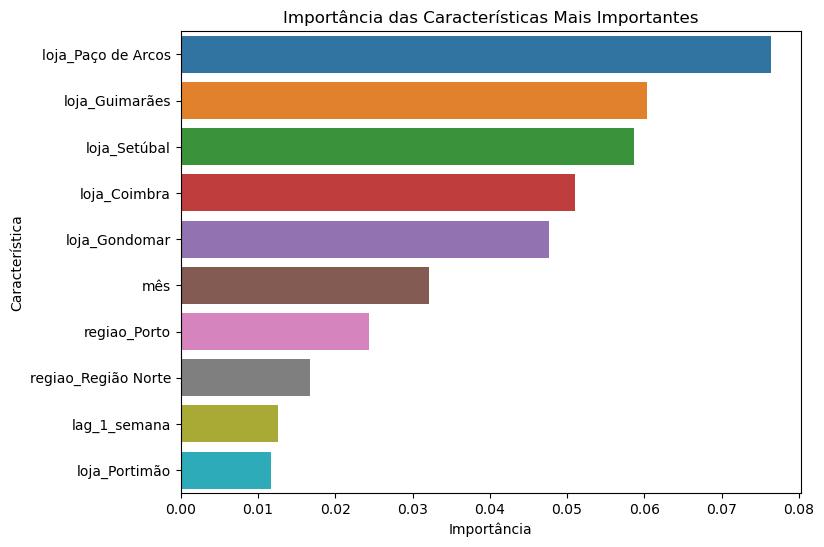

In [52]:
# índices das características ordenadas pela importância
indices = np.argsort(xgb_model.feature_importances_)[::-1]

# número de características mais importantes a serem mostradas
top_n = 11 


top_indices = indices[1:top_n]
top_importances = xgb_model.feature_importances_[top_indices]

# nomes das características correspondentes aos top_n índices
top_features = X_train.columns[top_indices]


plt.figure(figsize=(8, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Importância das Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

#### **7.1.4. Previsões XGBOOST do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

Execução modelo com os melhores parâmetros e atualizações iterativas dos dados de teste (X_test['lag_1_dia']; X_test['lag_1_semana']), a partir dos valores previstos (y_pred). Previsões futuras realizadas sequencialmente com base nas previsões anteriores.  
Ao incluir a atualização iterativa dos dados de teste com as previsões anteriores, verificou-se uma redução no desempenho do modelo

In [53]:
def previsao_por_loja(loja, model, X_test, y_test):
    # Redefinir os índices de X_test e y_test
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    # Filtrar os dados de teste para a loja específica
    coluna_loja = 'loja_' + loja
    X_loja = X_test[X_test[coluna_loja] == 1]
    y_loja = y_test[X_test[coluna_loja] == 1]  
    
    # Fazer previsões para o número especificado de dias
    previsoes = []
    erros_mae = []
    for i in range(len(X_loja)):
        # Fazer previsões para um único dia
        previsao_dia = model.predict(X_loja.iloc[[i]])
        previsoes.append(previsao_dia.round(2))
        if i + 1 < len(X_test):
            X_test.at[i + 1, 'lag_1_dia'] = previsao_dia
        if i + 7 < len(X_test):
            X_test.at[i + 7, 'lag_1_semana'] = previsao_dia

        # Calcular o erro MAE para a previsão atual
        erro_mae = mean_absolute_error(y_loja[i:i+1], previsao_dia)
        erros_mae.append(erro_mae.round(2))

    df_previsoes = pd.DataFrame({'Previsao (€)': previsoes, 'Erro_MAE (€)': erros_mae})
    
    # Começar o índice em 1
    df_previsoes.index += 1

    # Renomear o nome do índice para 'Dia'
    df_previsoes.rename_axis('Dia', inplace=True)
    
    return df_previsoes

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)


In [55]:
xgb_previsoes_loja= previsao_por_loja('Setúbal', xgb_model, X_test, y_test)
xgb_previsoes_loja

,Previsao (€),Erro_MAE (€)
Dia,,
1,[176402.22],17548.18
2,[150308.66],5259.71
3,[134377.86],10764.84
4,[144857.1],4112.69
5,[127388.93],22984.83
...,...,...
467,[120332.9],28328.77
468,[168044.6],38889.05
469,[236178.02],35512.77


In [56]:
# definir também fora da função anterior.

y_loja_xgb = y_test[X_test['loja_Setúbal'] == 1]

##### **7.1.4.1. Erro Quadrático Médio XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [57]:
xgb2_mse_setubal = mean_squared_error(y_loja_xgb, xgb_previsoes_loja['Previsao (€)'])
print("Erro quadrático médio (MSE):", xgb2_mse_setubal)

Erro quadrático médio (MSE): 503626046.7646703


##### **7.1.4.2. Erro Médio Absoluto XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [58]:
xgb2_mae_setubal = xgb_previsoes_loja['Erro_MAE (€)'].mean()
xgb2_mae_setubal.round(2)

19207.13

##### **7.1.4.3. Coeficiente de Determinação (R^2) XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [59]:
xgb2_r2_setubal = r2_score(y_loja_xgb, xgb_previsoes_loja['Previsao (€)'])
print("Coeficiente de determinação (R^2):", xgb2_r2_setubal.round(4))

Coeficiente de determinação (R^2): 0.7797


In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)


#### **7.1.5. Confiabilidade do Modelo XGB (visualização da acumulação dos erros) - Representação Gráfica e RSD (exemplo: Setúbal)**

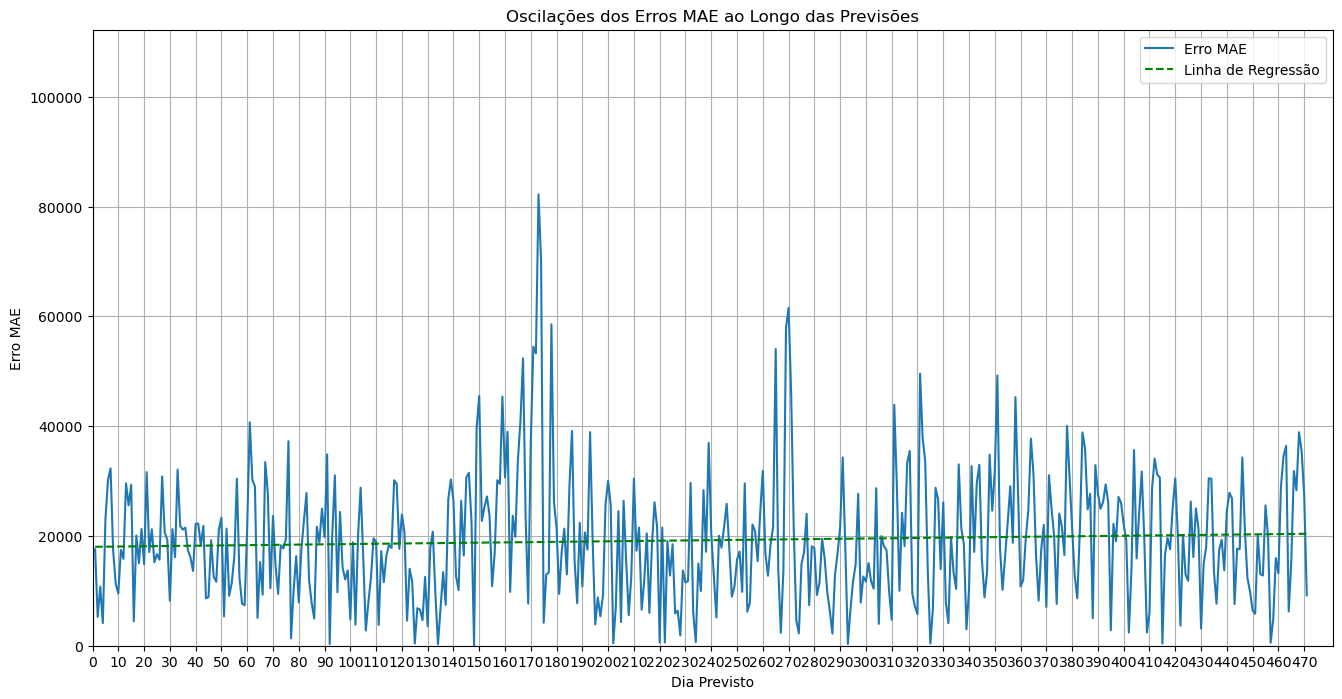

In [61]:
# Extrair os valores do erro MAE e os dias
erro_mae = xgb_previsoes_loja['Erro_MAE (€)']
dias = xgb_previsoes_loja.index

# Ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1), erro_mae)

# Fazer previsões usando o modelo de regressão linear
previsoes_regressao = regressor.predict(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1))

# Plotar os erros MAE ao longo do tempo com a linha de regressão
plt.figure(figsize=(16, 8))
plt.plot(dias, erro_mae, linestyle='-', label='Erro MAE')
plt.plot(dias, previsoes_regressao, linestyle='--', color='g', label='Linha de Regressão')
plt.title('Oscilações dos Erros MAE ao Longo das Previsões')
plt.xlabel('Dia Previsto')
plt.ylabel('Erro MAE')
plt.legend()
plt.grid(True)

# Definir limites nos eixos x e y
plt.xlim(1, len(erro_mae) + 10)  # Limite do eixo x
plt.ylim(0, max(erro_mae) + 30000)  # Limite do eixo y

# Divisões mais frequentes nos eixos x e y
plt.xticks(np.arange(0, len(erro_mae) + 1, 10))  # Divisões a cada 10 dias no eixo x

plt.show()

O Residual Standard Deviation (RSD) é uma medida de dispersão que indica a variabilidade média dos erros em torno da linha de regressão. Neste contexto, os erros são as diferenças entre os valores reais e os valores previstos pelo modelo.

In [62]:
# Calcula o quadrado dos erros
quadrados_erros_xgb= np.square(xgb_previsoes_loja['Erro_MAE (€)'])

# Calcula a média dos quadrados dos erros
media_quadrados_erros_xgb = np.mean(quadrados_erros_xgb)

# Calcula o desvio padrão dos erros
desvio_padrao_erros_xgb = np.sqrt(media_quadrados_erros_xgb)
desvio_padrao_erros_xgb

22441.61419665881

#### **7.1.6. Execução de XGBRegressor - SEM VARIÁVEL 'ITENS'**

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)


In [64]:
print(X_test_rfr.shape)
print(y_test_rfr.shape)

(32812, 134)
(32812,)


In [65]:
X_train_itens = X_train.drop(columns=['itens'])
X_test_itens = X_test_rfr.drop(columns=['itens'])
y_train_itens = y_train.drop(columns=['itens'])
y_test_itens = y_test_rfr.drop(columns=['itens'])

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train_itens.shape)
print(X_test_itens.shape)
print(y_train_itens.shape)
print(y_test_itens.shape)

(65816, 134)
(32812, 134)
(65816,)
(32812,)
(65816, 133)
(32812, 133)
(65816,)
(32812,)


##### **7.1.6.1. Randomized SearchCV (RSCV) - XGB Hypertuning Parameter  - SEM VARIÁVEL 'ITENS'**

In [67]:
# Definir o grid de parâmetros XGBoost:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [100, 500, 1000, 5000],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Definir a validação cruzada em séries temporais:
tscv = TimeSeriesSplit(n_splits=5)

# Realizar a busca aleatória de hiperparâmetros:
rs_search_sem_items = RandomizedSearchCV(estimator=xgb.XGBRegressor(),
                               param_distributions=param_distributions,
                               cv=tscv,
                               scoring='neg_mean_squared_error',
                               n_iter=20,
                               verbose=1000
                              )

# Treinar o modelo:
rs_search_sem_items.fit(X_train_itens, y_train_itens)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.1, max_depth=500, n_estimators=100.........


KeyboardInterrupt: 

##### **7.1.6.2. Melhores Parâmetros XGB (Best Params) - SEM VARIÁVEL 'ITENS'**

In [68]:
rs_search_sem_items.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

##### **Melhores Parâmetros XGB - Guardados - SEM VARIÁVEL 'ITENS'**

In [69]:
xgboost_params_sem_items= {'n_estimators': 300, 'max_depth': 5000, 'learning_rate': 0.3}

##### **7.1.6.3. Execução de XGBoost Regressor com os 'Melhores Parametros' Guardados Previamente - SEM VARIÁVEL 'ITENS'**

In [70]:
xgb_model_sem_itens = xgb.XGBRegressor(**xgboost_params_sem_items)
xgb_model_sem_itens.fit(X_train_itens, y_train_itens)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5000, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

##### **7.1.6.4. Previsões com os Melhores Parâmetros XGB - SEM VARIÁVEL 'ITENS'**

In [71]:
y_pred_itens = xgb_model_sem_itens.predict(X_test_itens)

##### **7.1.6.5. Erro Quadrático Médio XGB - SEM VARIÁVEL 'ITENS'**

In [72]:
xgb_itens_mse = mean_squared_error(y_test_itens, y_pred_itens)
print("Erro quadrático médio (MSE):", xgb_itens_mse)

Erro quadrático médio (MSE): 320943696.23081845


##### **7.1.6.6. Erro Médio Absoluto XGB - SEM VARIÁVEL 'ITENS'**

In [73]:
xgb_itens_mae = mean_absolute_error(y_test_itens, y_pred_itens)
print("Erro médio absoluto (MAE):", xgb_itens_mae)

Erro médio absoluto (MAE): 5633.042302658471


##### **7.1.6.7. Coeficiente de Determinação XGB (R^2) - SEM VARIÁVEL 'ITENS'**

In [74]:
xgb_itens_r2 = r2_score(y_test_itens, y_pred_itens)
print("Coeficiente de determinação (R^2):", xgb_itens_r2)

Coeficiente de determinação (R^2): 0.922522457845878


In [75]:
print(X_train_itens.shape)
print(X_test_itens.shape)
print(y_train_itens.shape)
print(y_test_itens.shape)

(65816, 133)
(32812, 133)
(65816,)
(32812,)


#### **7.1.7. Previsões XGB do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**

In [76]:
xgb_previsoes_sem_itens = previsao_por_loja('Setúbal', xgb_model_sem_itens, X_test_itens, y_test_itens)
xgb_previsoes_sem_itens

,Previsao (€),Erro_MAE (€)
Dia,,
1,[178449.64],15500.76
2,[166934.45],11366.08
3,[135925.39],9217.30
4,[170045.7],21075.92
5,[160308.33],9934.57
...,...,...
467,[151788.0],3126.33
468,[173929.4],33004.23
469,[228065.6],43625.17


##### **7.1.7.1. Erro Quadrático Médio XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [77]:
xgb2_mse_setubal_sem_items = mean_squared_error(y_loja_xgb, xgb_previsoes_sem_itens['Previsao (€)'])
print("Erro quadrático médio (MSE):", xgb2_mse_setubal_sem_items)

Erro quadrático médio (MSE): 917810773.8756806


##### **7.1.7.2. Erro Médio Absoluto XGB - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [78]:
xgb2_mae_setubal_sem_items = xgb_previsoes_sem_itens['Erro_MAE (€)'].mean()
xgb2_mae_setubal_sem_items.round(2)

21025.9

##### **7.1.7.3. Coeficiente de Determinação XGB (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [79]:
xgb2_r2_setubal_sem_items = r2_score(y_loja_xgb, xgb_previsoes_sem_itens['Previsao (€)'])
print("Coeficiente de determinação (R^2):", xgb2_r2_setubal_sem_items.round(4))

Coeficiente de determinação (R^2): 0.5985


#### **7.1.8. Confiabilidade do Modelo XGB (visualização da acumulação dos erros)- Representação Gráfica e RSD (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**

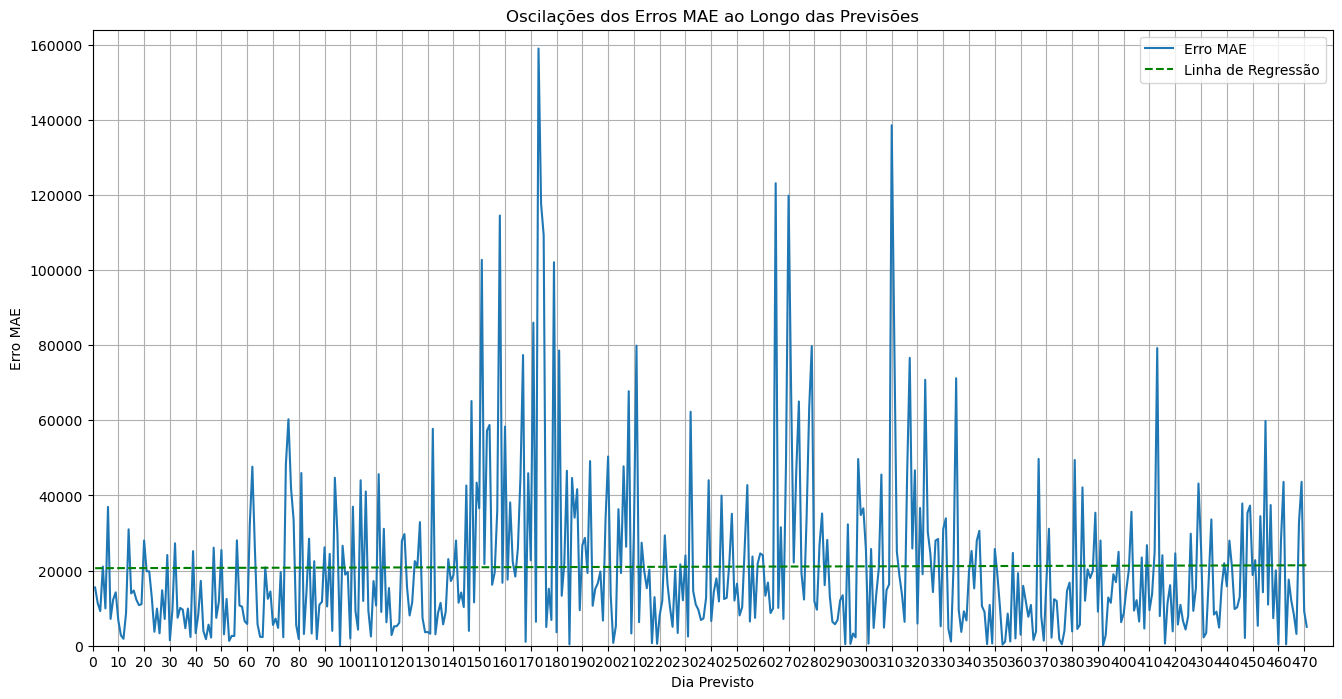

In [80]:
# Extrair os valores do erro MAE e os dias
erro_mae = xgb_previsoes_sem_itens['Erro_MAE (€)']
dias = xgb_previsoes_sem_itens.index

# Ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1), erro_mae)

# Fazer previsões usando o modelo de regressão linear
previsoes_regressao = regressor.predict(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1))

# Plotar os erros MAE ao longo do tempo com a linha de regressão
plt.figure(figsize=(16, 8))
plt.plot(dias, erro_mae, linestyle='-', label='Erro MAE')
plt.plot(dias, previsoes_regressao, linestyle='--', color='g', label='Linha de Regressão')
plt.title('Oscilações dos Erros MAE ao Longo das Previsões')
plt.xlabel('Dia Previsto')
plt.ylabel('Erro MAE')
plt.legend()
plt.grid(True)

# Definir limites nos eixos x e y
plt.xlim(1, len(erro_mae) + 10)  # Limite do eixo x
plt.ylim(0, max(erro_mae) + 5000)  # Limite do eixo y

# Divisões mais frequentes nos eixos x e y
plt.xticks(np.arange(0, len(erro_mae) + 1, 10))  # Divisões a cada 10 dias no eixo x

plt.show()

In [81]:
# Calcula o quadrado dos erros
quadrados_erros_xgb_sem_itens = np.square(xgb_previsoes_sem_itens['Erro_MAE (€)'])

# Calcula a média dos quadrados dos erros
media_quadrados_erros_xgb_sem_itens = np.mean(quadrados_erros_xgb_sem_itens)

# Calcula o desvio padrão dos erros
desvio_padrao_erros_xgb_sem_itens = np.sqrt(media_quadrados_erros_xgb_sem_itens)
desvio_padrao_erros_xgb_sem_itens

30295.39192721554

Desvio quadrático padrão da média de erros é maior neste caso. Existe uma maior variabilidade dos erros em relação à média de erros comparativamente ao modelo treinado com a coluna 'itens' no X_train e X_test. Sugere portanto, que os erros individuais estão mais dispersos em relação à média de erros, em comparação com o modelo anterior.

### **7.2. Random Forest Regressor (RFR)**

##### **Converter valores nulos em 0**

In [82]:
# RandomForestRegressor não aceita valores nulos (ao contrário de XGBRegressor), por isso alteramos os valores nulos para 0.

X_train_rfr2 = X_train.fillna(0)
X_train_itens = X_train_itens.fillna(0)

#### **7.2.1. Randomized SearchCV (RSCV) - RFR Hypertuning Parameter**

In [83]:
# Definir o grid de parâmetros
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 50, 100, 500, 1000, 5000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Definir a validação cruzada em séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# Realizar a busca aleatória de hiperparâmetros
rfg_rs_search_sem_items = RandomizedSearchCV(estimator=RandomForestRegressor(),
                               param_distributions=param_distributions,
                               cv=tscv,
                               scoring='neg_mean_squared_error',
                               n_iter=20,
                               verbose=1000
                              )
# Treinar o modelo
rfg_rs_search_sem_items.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START bootstrap=True, max_depth=5000, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 1/20] END bootstrap=True, max_depth=5000, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-80076437.487 total time=  22.6s
[CV 2/5; 1/20] START bootstrap=True, max_depth=5000, min_samples_leaf=4, min_samples_split=2, n_estimators=200


KeyboardInterrupt: 

##### **7.2.1.1. Melhores Parâmetros RFR (Best Params)**

In [84]:
#diz 'sem_items' mas é COM items - para não estar a definir novamente o nome do objeto..
rfg_rs_search_sem_items.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

##### **Melhores Parâmetros RFR (Best Params) - Guardados**

In [85]:
rfg_params= {'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 500,
 'bootstrap': True}

#### **7.2.2. Execução de Random Forest Regressor com os Melhores Parametros Guardados Previamente**

Para evitar a necessidade de executar novamente o Randomized SearchCV (RSCV) a cada execução ou alteração deste notebook, os treinos, previsões e métricas do modelo foram realizados utilizando os melhores parâmetros previamente obtidos por meio do Randomized SearchCV (RSCV).

In [86]:
rfg_model = RandomForestRegressor(**rfg_params)
rfg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=500, min_samples_leaf=4, min_samples_split=5)

##### **7.2.2.1. Best Score RFR**

In [87]:
rfg_rs_search_sem_items.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

##### **7.2.2.2. Predições com os Melhores Parâmetros RFR** 

In [88]:
y_pred_rfc = rfg_model.predict(X_test_rfr2)

##### **7.2.2.3. Erro Quadrático Médio RFR**

In [89]:
rfg_mse = mean_squared_error(y_test_rfr2, y_pred_rfc)
print("Erro quadrático médio (MSE):", rfg_mse)

Erro quadrático médio (MSE): 210999931.09452778


##### **7.2.2.4. Erro Médio Absoluto RFR**

In [90]:
rfg_mae = mean_absolute_error(y_test_rfr2, y_pred_rfc)
print("Erro médio absoluto (MAE):", rfg_mae)

Erro médio absoluto (MAE): 4392.4715314578125


##### **7.2.2.5. Coeficiente de Determinação RFR (R^2)**

In [91]:
rfg_r2 = r2_score(y_test_rfr2, y_pred_rfc)
print("Coeficiente de determinação (R^2):", rfg_r2)

Coeficiente de determinação (R^2): 0.9490634767160655


##### **7.2.2.6. Feature Importance RFR (sem incluir 'itens')**

In [92]:
rfg_model.feature_importances_

array([9.71373279e-01, 5.84916936e-04, 1.71029314e-03, 5.21520090e-04,
       5.17667711e-04, 2.69408834e-04, 1.65044369e-04, 3.57301382e-04,
       4.03394935e-04, 3.18947590e-04, 0.00000000e+00, 1.43951427e-04,
       1.51638945e-04, 1.12610352e-02, 3.04104733e-03, 8.56312001e-03,
       1.72434326e-05, 2.92583455e-05, 1.40888450e-06, 3.49791063e-08,
       1.34410587e-07, 3.80283359e-07, 1.00409028e-06, 1.69109031e-05,
       8.84130515e-07, 1.16533477e-07, 1.22283262e-06, 1.84812295e-06,
       2.11071745e-06, 7.56520618e-07, 5.43496114e-06, 1.74025495e-05,
       1.33467816e-06, 5.33570040e-05, 2.14909707e-07, 1.89424319e-05,
       1.94535917e-06, 1.36823593e-06, 5.19805401e-07, 4.66637920e-06,
       1.33823787e-08, 1.60375357e-08, 3.99248764e-09, 9.87987256e-09,
       3.15822246e-08, 3.51069777e-07, 4.67849495e-08, 1.43732800e-08,
       6.96163491e-08, 1.82406752e-08, 5.06339181e-09, 9.74299208e-09,
       2.92374744e-07, 2.54701454e-08, 4.99711191e-08, 1.93687210e-08,
      

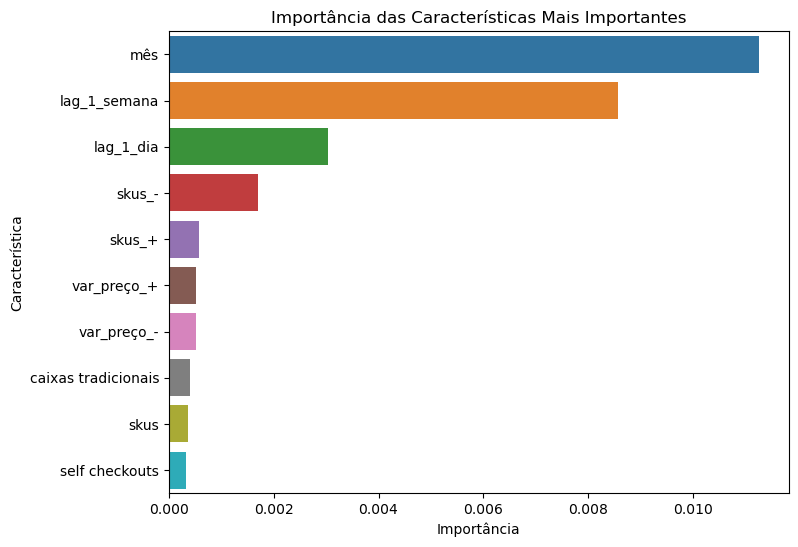

In [93]:
# índices das características ordenadas pela importância
indices = np.argsort(rfg_model.feature_importances_)[::-1]

# número de características mais importantes a serem mostradas
top_n = 11 


top_indices = indices[1:top_n]
top_importances = rfg_model.feature_importances_[top_indices]

# nomes das características correspondentes aos top_n índices
top_features = X_train.columns[top_indices]


plt.figure(figsize=(8, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Importância das Características Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

#### **7.2.3. Previsões com os Melhores Parâmetros RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)** 

In [94]:
rfg_previsoes = previsao_por_loja('Setúbal', rfg_model, X_test_rfr2, y_test_rfr2)
rfg_previsoes

,Previsao (€),Erro_MAE (€)
Dia,,
1,[178029.71],15920.69
2,[147188.05],8380.32
3,[133398.92],11743.78
4,[147847.71],1122.08
5,[132442.1],17931.66
...,...,...
467,[122919.67],25742.00
468,[173124.22],33809.42
469,[243788.2],27902.58


##### **7.2.3.1. Erro Quadrático Médio RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [95]:
rfg2_mse = mean_squared_error(y_loja_xgb, rfg_previsoes['Previsao (€)'])
print("Erro quadrático médio (MSE):", rfg2_mse)

Erro quadrático médio (MSE): 460502253.74855644


##### **7.2.3.2. Erro Médio Absoluto RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [96]:
rfg2_mae = rfg_previsoes['Erro_MAE (€)'].mean()
rfg2_mae

18355.735456475584

##### **7.2.3.3. Coeficiente de Determinação (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal)**

In [97]:
rfg2_r2 = r2_score(y_loja_xgb, rfg_previsoes['Previsao (€)'])
print("Coeficiente de determinação (R^2):", rfg2_r2)

Coeficiente de determinação (R^2): 0.7985592915543877


#### **7.2.4. Confiabilidade do Modelo RFR (visualização da acumulação dos erros) - Representação Gráfica e RSD (exemplo: Setúbal)**

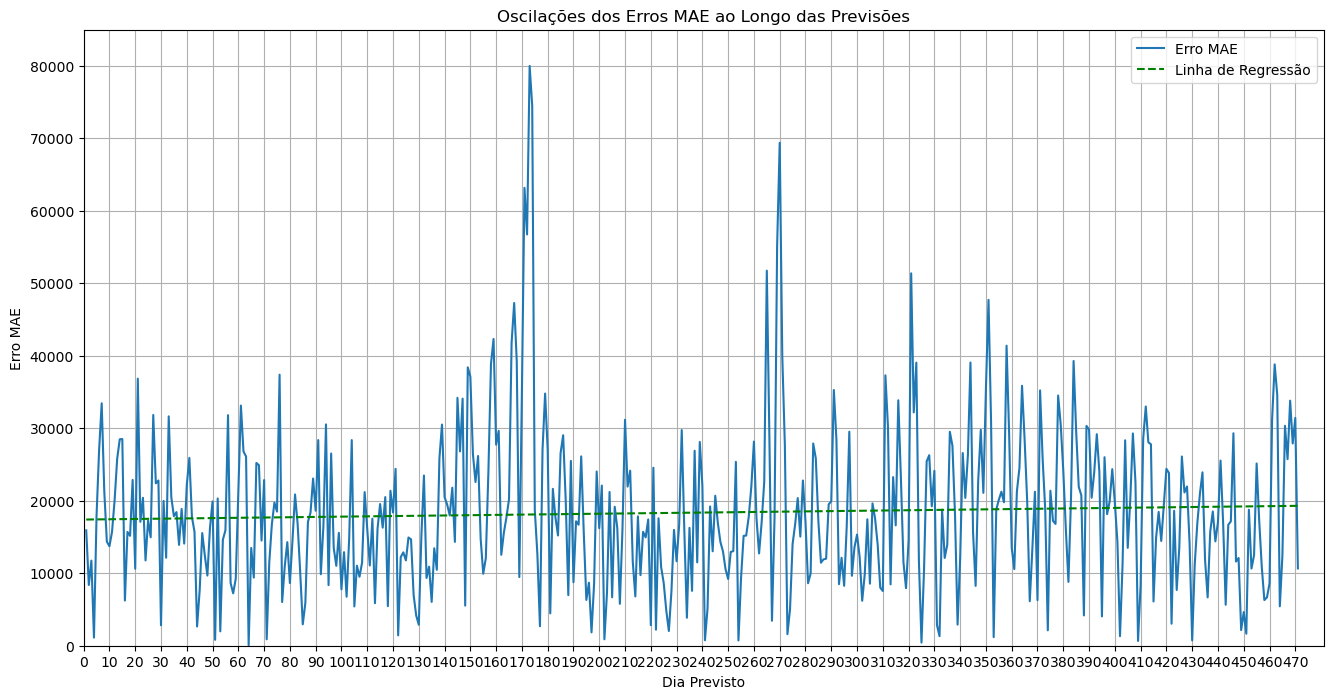

In [98]:
# Extrair os valores do erro MAE e os dias
erro_mae = rfg_previsoes['Erro_MAE (€)']
dias = rfg_previsoes.index

# Ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1), erro_mae)

# Fazer previsões usando o modelo de regressão linear
previsoes_regressao = regressor.predict(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1))

# Plotar os erros MAE ao longo do tempo com a linha de regressão
plt.figure(figsize=(16, 8))
plt.plot(dias, erro_mae, linestyle='-', label='Erro MAE')
plt.plot(dias, previsoes_regressao, linestyle='--', color='g', label='Linha de Regressão')
plt.title('Oscilações dos Erros MAE ao Longo das Previsões')
plt.xlabel('Dia Previsto')
plt.ylabel('Erro MAE')
plt.legend()
plt.grid(True)

# Definir limites nos eixos x e y
plt.xlim(1, len(erro_mae) + 10)  # Limite do eixo x
plt.ylim(0, max(erro_mae) + 5000)  # Limite do eixo y

# Divisões mais frequentes nos eixos x e y
plt.xticks(np.arange(0, len(erro_mae) + 1, 10))  # Divisões a cada 10 dias no eixo x

plt.show()

In [99]:
# Calcula o quadrado dos erros
rfg_quadrados_erros = np.square(rfg_previsoes['Erro_MAE (€)'])

# Calcula a média dos quadrados dos erros
rfg_media_quadrados_erros = np.mean(rfg_quadrados_erros)

# Calcula o desvio padrão dos erros
desvio_padrao_erros = np.sqrt(rfg_media_quadrados_erros)
desvio_padrao_erros

21459.316617505254

#### **7.2.5. Execução de Random Forest Regressor - SEM VARIÁVEL 'ITENS'**

In [100]:
X_train_itens = X_train.drop(columns=['itens'])
X_test_itens = X_test_rfr3.drop(columns=['itens'])
y_train_itens = y_train.drop(columns=['itens'])
y_test_itens = y_test_rfr3.drop(columns=['itens'])

In [101]:
print(X_train_itens.shape)
print(X_test_itens.shape)
print(y_train_itens.shape)
print(y_test_itens.shape)

(65816, 133)
(32812, 133)
(65816,)
(32812,)


##### **7.1.5.1. Randomized SearchCV (RSCV) - RFR Hypertuning Parameter  - SEM VARIÁVEL 'ITENS'**

In [102]:
# Definir o grid de parâmetros
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 50, 100, 500, 1000, 5000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Definir a validação cruzada em séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# Realizar a busca aleatória de hiperparâmetros
rfg_rs_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                               param_distributions=param_distributions,
                               cv=tscv,
                               scoring='neg_mean_squared_error',
                               n_iter=20,
                               verbose=1000
                              )
# Treinar o modelo
rfg_rs_search.fit(X_train_itens, y_train_itens)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START bootstrap=False, max_depth=500, min_samples_leaf=4, min_samples_split=2, n_estimators=200


KeyboardInterrupt: 

##### **7.2.5.2. Melhores Parâmetros RFR (Best Params) - SEM VARIÁVEL 'ITENS'**

In [103]:
#agora sim seria 'sem_items' no nome da variável..

rfg_rs_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

##### **Melhores Parâmetros RFR - Guardados - SEM VARIÁVEL 'ITENS'**

In [104]:
rfr_params_sem_items = {'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 500,
 'bootstrap': True}

##### **7.2.5.3. Execução de RFR com os 'Melhores Parametros' Guardados Previamente - SEM VARIÁVEL 'ITENS'**

In [105]:
rfr_model_sem_itens = RandomForestRegressor(**rfr_params_sem_items)
rfr_model_sem_itens.fit(X_train_itens, y_train_itens)

RandomForestRegressor(max_depth=500, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

##### **7.2.5.4. Previsões com os Melhores Parâmetros RFR - SEM VARIÁVEL 'ITENS'**

In [106]:
y_pred_itens = rfr_model_sem_itens.predict(X_test_itens)

##### **7.2.5.5. Erro Médio Quadrático RFR - SEM VARIÁVEL 'ITENS'**

In [107]:
rfr_mse_itens = mean_squared_error(y_test_itens, y_pred_itens)
print("Erro quadrático médio (MSE):", rfr_mse_itens)

Erro quadrático médio (MSE): 290235348.2701965


##### **7.2.5.6. Erro Médio Absoluto RFR - SEM VARIÁVEL 'ITENS'**

In [108]:
rfr_mae_itens = mean_absolute_error(y_test_itens, y_pred_itens)
print("Erro médio absoluto (MAE):", rfr_mae_itens)

Erro médio absoluto (MAE): 5052.576657507226


##### **7.2.5.7. Coeficiente de Determinação RFR (R^2) - SEM VARIÁVEL 'ITENS'**

In [109]:
rfr_r2_itens = r2_score(y_test_itens, y_pred_itens)
print("Coeficiente de determinação (R^2):", rfr_r2_itens)

Coeficiente de determinação (R^2): 0.9299356189440522


#### **7.2.6. Previsões RFR do 'valor' de vendas por Loja com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**

In [110]:
rfr_previsoes_sem_itens = previsao_por_loja('Setúbal', rfr_model_sem_itens, X_test_itens, y_test_itens)
rfr_previsoes_sem_itens

,Previsao (€),Erro_MAE (€)
Dia,,
1,[182579.08],11371.32
2,[156522.47],954.10
3,[143663.97],1478.72
4,[159391.76],10421.97
5,[161294.25],10920.50
...,...,...
467,[142934.34],5727.32
468,[174893.48],32040.16
469,[250511.08],21179.70


##### **7.2.6.1. Erro Quadrático Médio RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [111]:
rfr2_mse_setubal_sem_items = mean_squared_error(y_loja_xgb, rfr_previsoes_sem_itens['Previsao (€)'])
print("Erro quadrático médio (MSE):", rfr2_mse_setubal_sem_items)

Erro quadrático médio (MSE): 812450161.6815526


##### **7.2.6.2. Erro Médio Absoluto RFR - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [112]:
rfr2_mae_setubal_sem_items = rfr_previsoes_sem_itens['Erro_MAE (€)'].mean()
rfr2_mae_setubal_sem_items.round(2)

18637.84

##### **7.2.6.3. Coeficiente de Determinação RFR (R^2) - com Atualizações Iterativas dos Dados de Teste (exemplo: Setúbal) (SEM VARIÁVEL 'ITENS')**

In [113]:
rfr2_r2_setubal_sem_items = r2_score(y_loja_xgb, rfr_previsoes_sem_itens['Previsao (€)'])
print("Coeficiente de determinação (R^2):", rfr2_r2_setubal_sem_items.round(4))

Coeficiente de determinação (R^2): 0.6446


#### **7.2.7. Confiabilidade do Modelo RFR (visualização da acumulação dos erros)- Representação Gráfica e RSD (exemplo: Setúbal) - SEM VARIÁVEL 'ITENS'**

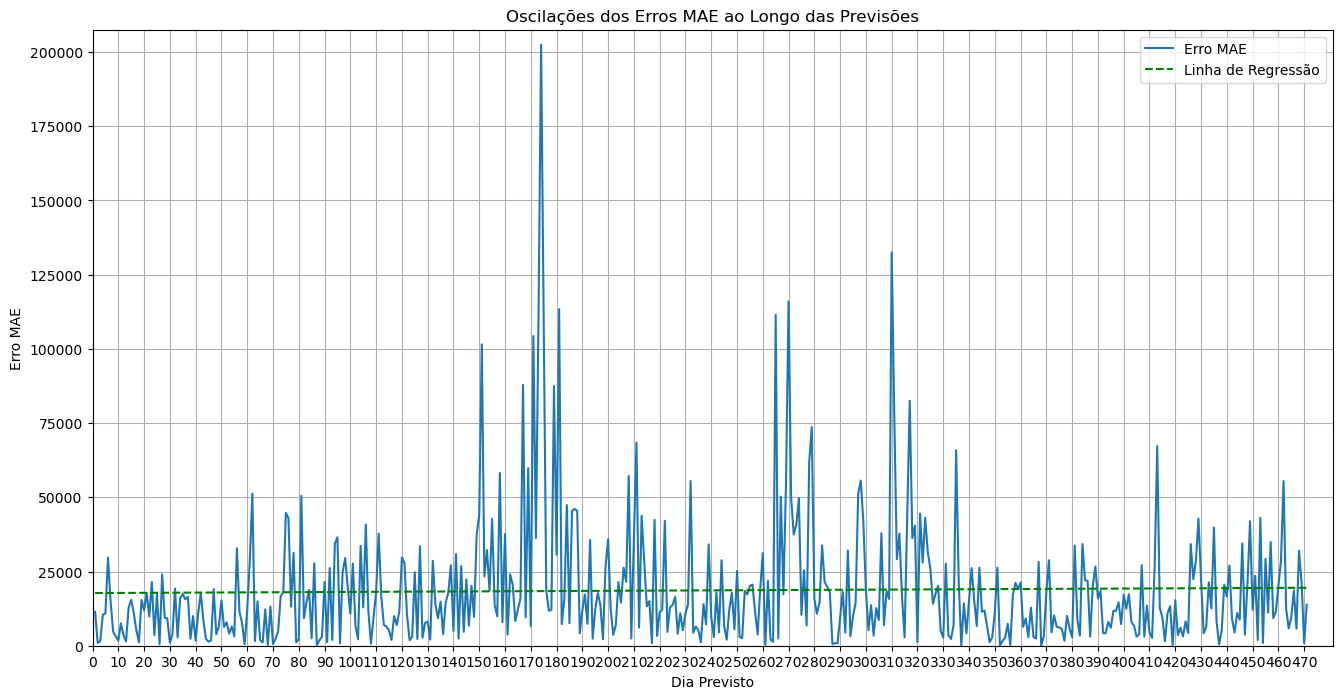

In [114]:
# Extrair os valores do erro MAE e os dias
erro_mae = rfr_previsoes_sem_itens['Erro_MAE (€)']
dias = rfr_previsoes_sem_itens.index

# Ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1), erro_mae)

# Fazer previsões usando o modelo de regressão linear
previsoes_regressao = regressor.predict(np.array(range(1, len(erro_mae) + 1)).reshape(-1, 1))

# Plotar os erros MAE ao longo do tempo com a linha de regressão
plt.figure(figsize=(16, 8))
plt.plot(dias, erro_mae, linestyle='-', label='Erro MAE')
plt.plot(dias, previsoes_regressao, linestyle='--', color='g', label='Linha de Regressão')
plt.title('Oscilações dos Erros MAE ao Longo das Previsões')
plt.xlabel('Dia Previsto')
plt.ylabel('Erro MAE')
plt.legend()
plt.grid(True)

# Definir limites nos eixos x e y
plt.xlim(1, len(erro_mae) + 10)  # Limite do eixo x
plt.ylim(0, max(erro_mae) + 5000)  # Limite do eixo y

# Divisões mais frequentes nos eixos x e y
plt.xticks(np.arange(0, len(erro_mae) + 1, 10))  # Divisões a cada 10 dias no eixo x

plt.show()

In [115]:
# Calcula o quadrado dos erros
quadrados_erros_rfr_sem_itens = np.square(rfr_previsoes_sem_itens['Erro_MAE (€)'])

# Calcula a média dos quadrados dos resíduos
media_quadrados_erros_rfr_sem_itens = np.mean(quadrados_erros_rfr_sem_itens)

# Calcula o desvio padrão dos resíduos
desvio_padrao_erros_rfr_sem_itens = np.sqrt(media_quadrados_erros_rfr_sem_itens)
desvio_padrao_erros_rfr_sem_itens

28503.51127925583

## **8. Conclusão:**

Ao combinar técnicas de pré-processamento de dados, como normalização, one-hot-encoding e método shift, com modelos avançados de machine learning, como XGBoostRegressor e RandomForestRegressor, fomos capazes de desenvolver modelos preditivos para prever o valor de vendas de cada loja. Esses modelos têm o potencial de fornecer informações valiosas para orientar as estratégias de negócios e melhorar o desempenho geral da empresa.

Em conclusão, os resultados obtidos através da aplicação de modelos de Machine Learning, especificamente XGBoost e Random Forest, revelaram um desempenho com um elevado coeficiente de determinação (R^2) de 0,95, demonstrando uma capacidade significativa de prever as vendas com base nos dados fornecidos. No entanto, ao realizar iterações nos dados de teste, incorporando previsões anteriores (para atualização e determinação das previsões seguintes), e ao remover a variável 'itens', observou-se uma redução no desempenho dos modelos, indicando uma sensibilidade às mudanças na estrutura dos dados.  

Para a loja de Setúbal, o modelo Random Forest parece ter um desempenho ligeiramente melhor em ambas as configurações, com um R^2 mais alto e menores valores de MAE e MSE. Isso sugere que, para essa loja específica, o Random Forest pode ser mais adequado para fazer previsões de vendas.

É importante destacar que, embora os modelos tenham mostrado uma redução no desempenho, especialmente após a 150ª previsão para a loja de Setúbal, esse último cenário pode ser considerado mais realista, pois reflete a natureza volátil e dinâmica das vendas de itens. Isso sugere que, apesar da diminuição na precisão das previsões, os modelos ainda são úteis para fornecer insights valiosos sobre as tendências de vendas, especialmente quando há flutuações significativas nos dados.

Portanto, os resultados obtidos destacam a importância de considerar não apenas a precisão absoluta dos modelos, mas também a capacidade de adaptação a mudanças nas condições e na disponibilidade dos dados, nomeaddamente a ausência de dados sobre as quantidades de vendas futuras.

|                | R^2  | MAE   | MSE          |
|----------------|------|-------|--------------|
| XGBoost*       | 0,95 | 4 597 | 213 506 079  |
| Random Forest* | 0,95 | 4 397 | 212 219 282  |
|                |      |       |              |
| **Loja de Setúbal** |      |       |         |
| XGBoost**      | 0,78 | 20 914| 581 769 002  |
| XGBoost***     | 0,60 | 21 026| 917 810 774  |
| Random Forest** | 0,80 | 18 461| 464 070 699  |
| Random Forest***| 0,65 | 18 636| 801 434 340  |


- : Execução do modelo com os melhores parâmetros;

- *: Execução do modelo com os melhores parâmetros e atualizações iterativas dos dados de teste (X_test['lag_1_dia']; X_test['lag_1_semana']) a partir dos valores previstos (y_pred);

- **: o mesmo que em ‘*’, mas sem considerar a variável ‘itens’.